# <center> École des Ponts ParisTech</center>
## <center> SPH pour l'hydraulique </center>
### <center> Projet SPH GMM 2021</center>
#### <center> Parois mobiles  </center>
<center> Ruben Persicot & Yohan Lanier </center>


<center> Encadrants : Rémi Carmigniani et Damien Violeau </center>

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
from sys import exit
import os.path
from os import path
import csv
import time
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['text.usetex'] = True
from src.spyh import *
from src.checkTD3 import *
from src.sphvar import *
from src.plotParticles import *
from src.state import *
from src.contrib import *
from src.analytical_solutions import *
from src.solidStuffManagement import *

In [2]:
#FLUID PARAMETERS 
e = 0.5 #half width in meters
U = 1 # Upper bound velocity
Re = 1 # Reynolds number
#FLUID PARAMETERS
rhoF = 1000
mu = 200 #(Pa.s)
print(mu)
grav = np.array([0.0,-9.81])#np.array([0.0,-9.81])#np.array([0.0,0.0]) #m.s-2#OTHER FLUID PARAMETERS
c0 = 10*U
gamma = 7
B = rhoF*c0**2/gamma 
#DENSITY & SHEPARD THRESHOLDS : 
shepardMin = 10**(-6)
rhoMin = 0.5*rhoF
rhoMax = 1.5*rhoF


200


In [3]:
#GEOMETRY
Lx = 2
Ly = 2
lx = 0.5
ly=1
#PARTICLES & SPACES PARAMETERS : 
dr = ly/20
h = smthfc*dr
m=dr*dr*rhoF
lspace = 2*h
#SOLID PARAMETERS
ls = 0.4
ws = 0.2
rhoS = 100
ms = dr*dr*rhoS 
print(ms)
#COMPUTATION DOMAIN : 
xOrigin = -nBound*dr
yOrigin = -nBound*dr
xSize = Lx+2*nBound*dr
ySize = Ly+2*nBound*dr
xMax = xOrigin+xSize
yMax = yOrigin+ySize
#INIT SPACES & PART:
posSpace,neibSpace,partSpace,listNeibSpace = \
init_spaces(xOrigin,yOrigin,xSize,ySize,lspace,dr)
part = init_particles()

0.25000000000000006


In [4]:
#INIT PART:
#% COMPLETE HERE
part = addBox(part,[Lx,Ly/2],FLUID,dr,rhoF)
part = addBox(part,[-nBound*dr,-nBound*dr,Lx+2*nBound*dr,nBound*dr],BOUND,dr,rhoF)
part = addBox(part,[-nBound*dr,0,nBound*dr,Ly],BOUND,dr,rhoF)
part = addBox(part,[Lx,0,nBound*dr,Ly],BOUND,dr,rhoF)
numberOfNonSolidParticles = len(part)
part = addBox(part,[(Lx-ws)/2, (Ly-ls), ws, ls], MOBILESOLID, dr, rhoS)
part,partSpace = sortPart(part,posSpace,partSpace,xOrigin,yOrigin,xSize,ySize,lspace,dr)
listNeibSpace= getListNeib(partSpace,neibSpace,listNeibSpace)
numberOfSolidPart = len(part)-numberOfNonSolidParticles
# END

<IPython.core.display.Javascript object>


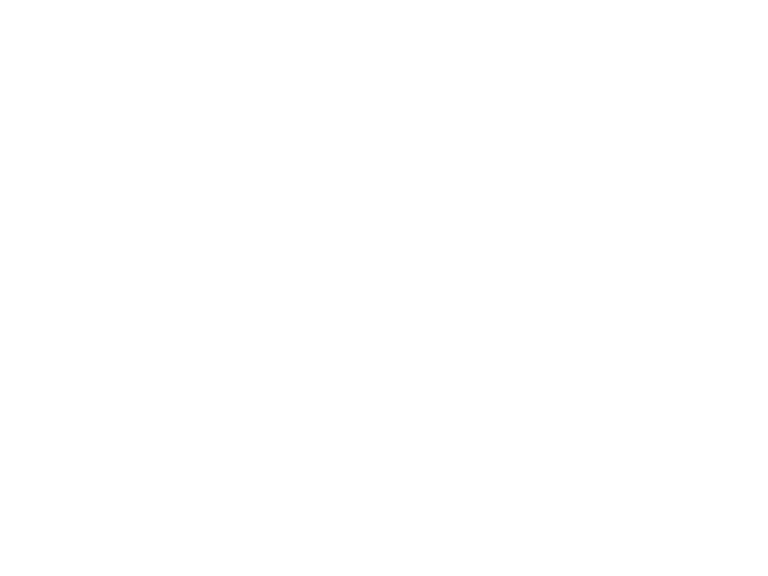

In [5]:
%matplotlib notebook
Umax= 1
tabUx = part[:,VEL[0]]
domain = [xOrigin,xMax,yOrigin,yMax,0,Umax]
plotPropertiesWithBound(part,tabUx,r'$U_x$',domain,dr,1)

In [6]:
plotSpaces(posSpace,'k',lspace,1)
neibSpace[2][neibSpace[2]>-1]
spacesOutline(posSpace[neibSpace[2][neibSpace[2]>-1]],'r',lspace,1)

Initialisation de la pression

In [7]:
def initWaterPressure(part):
    infoTab = part[:,INFO]
    y_i = part[infoTab == FLUID] [:,POS[1]]
    p_i = np.linalg.norm(grav)*rhoF*(Ly/2-y_i)
    rho_i = density(p_i,B,rhoF,gamma)
    part[infoTab == FLUID, RHO] = rho_i
    return part

<IPython.core.display.Javascript object>


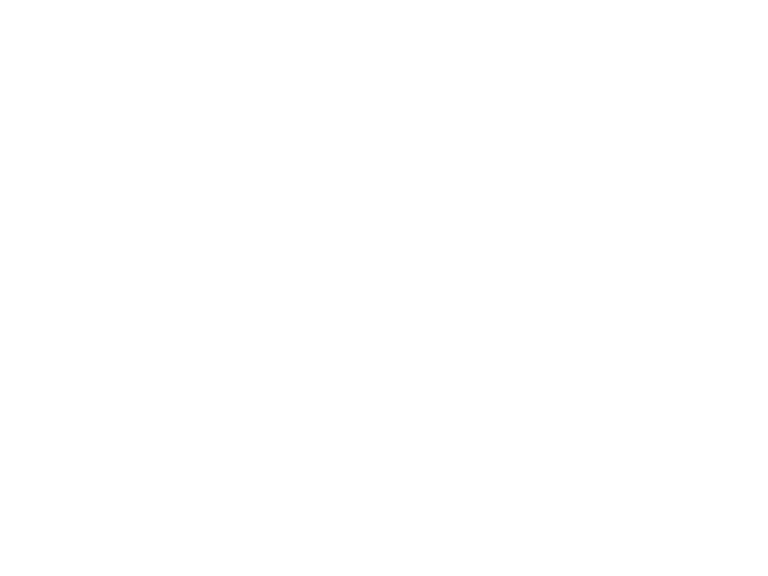

In [8]:
part = initWaterPressure(part)
%matplotlib notebook
Pmax= rhoF*np.linalg.norm(grav)*Ly/2
tabPres = pressure(part[:,RHO],B,rhoF,gamma)
domain = [xOrigin,xMax,yOrigin,yMax,0,Pmax]
plotPropertiesWithBound(part,tabPres,r'Pressure',domain,dr,1)

In [9]:
#Managing the center of mass
#OG = computeCenterOfMass(part, numberOfSolidPart)
infoTab = part[:,INFO]
OG = np.array([1/numberOfSolidPart*np.sum(part[infoTab == MOBILESOLID] [:,POS[0]]),1/numberOfSolidPart*np.sum(part[infoTab == MOBILESOLID] [:,POS[1]])])
print(OG)
V_OG = np.array([0,0])
A_OG = np.array([0,0])

[1.  1.8]


In [10]:
current_directory = os.getcwd()
case_directory = os.path.join(current_directory, r'Results/Floating_solid_'+time.strftime("%Y%m%d_%H%M%S"))
os.mkdir(case_directory)
data_directory = os.path.join(case_directory,r'Data')
figures_directory = os.path.join(case_directory,r'Figures')
os.mkdir(data_directory)
os.mkdir(figures_directory)

In [11]:
# Here we specify the output frequencies
dt_figure = 0.005#0.025*e**2*rhoF/mu
t_print = 0
#final time :
t_end = 3
t=0
it=0
im_count=0

Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[ 0.00e+00 -9.81e-06] [ 0.      -0.00981]
time
0.0010000000000000002


<IPython.core.display.Javascript object>


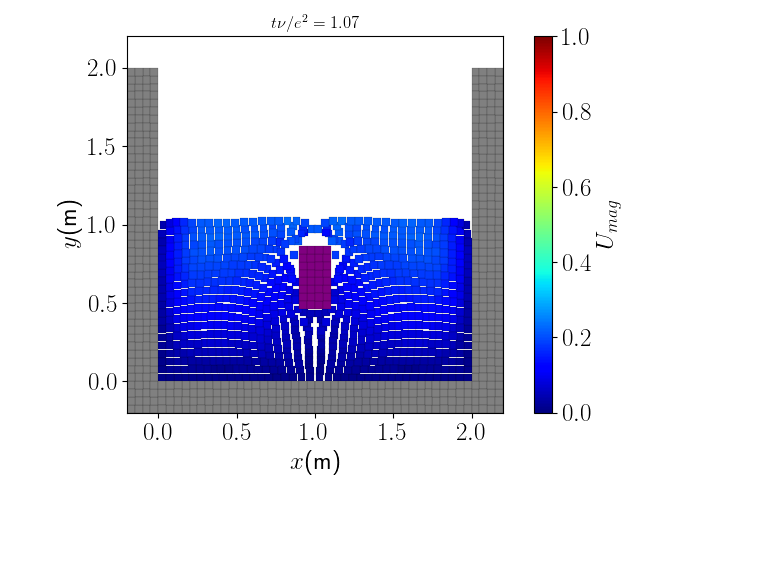

Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[ 0.00000000e+00 -1.95911669e-05] [ 0.         -0.01961039]
time
0.0019990199614178493
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[ 0.00000000e+00 -2.92672347e-05] [ 0.         -0.02938205]
time
0.0029951122529268764
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[ 0.00000000e+00 -3.88586292e-05] [ 0.         -0.03912521]
time
0.003988298713446644
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[ 0.0000000e+00 -4.8366654e-05] [ 0.         -0.04884011]
time
0.004978604676430668
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[ 0.00000000e+00 -5.77925126e-05] [ 0.       -0.058527]
time
0.0059660551161967515
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[ 0.00000000e+00 -6.71373839e-05] [ 0.         -0.06818612]
time
0.006950674647780792
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[ 0.00000000e+00 -7.64024233e-05] [ 0.        -0.0778177]
time
0.007932487534124366
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[ 0.00000000e+00 -8.55887634e-05] [ 0.         -0.08742199]

Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[ 0.         -0.00053119] [ 0.         -0.62927109]
time
0.06414588055714984
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[ 0.         -0.00053704] [ 0.         -0.63753475]
time
0.06498825174473351
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[ 0.         -0.00054285] [ 0.         -0.64578117]
time
0.06582886500422079
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[ 0.         -0.00054863] [ 0.         -0.65401044]
time
0.06666773131343687
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[ 0.         -0.00055437] [ 0.         -0.66222269]
time
0.0675048615363135
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[ 0.         -0.00056007] [ 0.         -0.67041801]
time
0.06834026642453767
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[ 0.         -0.00056574] [ 0.         -0.67859651]
time
0.06917395661916952
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[ 0.         -0.00057137] [ 0.        -0.6867583]
time
0.07000594265223055
Force fluid -> solid :
[0. 0.]
dOG, V_OG :


Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[ 0.         -0.00086498] [ 0.         -1.16383471]
time
0.11863758494437006
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[ 0.         -0.00086898] [ 0.         -1.17111382]
time
0.11937959412436745
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[ 0.         -0.00087295] [ 0.         -1.17838114]
time
0.12012040163463956
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[ 0.         -0.00087691] [ 0.         -1.18563673]
time
0.1208600133019183
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[ 0.         -0.00088085] [ 0.         -1.19288065]
time
0.12159843490596348
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[ 0.         -0.00088477] [ 0.         -1.20011294]
time
0.12233567218009149
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[ 0.         -0.00088867] [ 0.         -1.20733368]
time
0.12307173081169642
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[ 0.         -0.00089255] [ 0.         -1.21454291]
time
0.12380661644276364
Force fluid -> solid :
[0. 0.]
dOG, V_OG 

Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[ 0.         -0.00110507] [ 0.         -1.64766424]
time
0.1679576188693786
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[ 0.         -0.00110801] [ 0.         -1.65423498]
time
0.16862741868819733
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[ 0.         -0.00111093] [ 0.         -1.66079704]
time
0.1692963345416307
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[ 0.         -0.00111385] [ 0.         -1.66735047]
time
0.1699643699238794
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[ 0.         -0.00111675] [ 0.         -1.67389529]
time
0.17063152830617026
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[ 0.         -0.00111965] [ 0.         -1.68043155]
time
0.17129781313696732
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[ 0.         -0.00112253] [ 0.         -1.68695927]
time
0.1719632278421803
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[ 0.        -0.0011254] [ 0.         -1.69347848]
time
0.17262777582537067
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[ 0

time
0.21288130336989994
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[ 0.         -0.00128862] [ 0.         -2.09440139]
time
0.21349657395538002
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[ 0.         -0.00129089] [ 0.         -2.10043047]
time
0.21411115932376262
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[ 0.         -0.00129316] [ 0.         -2.10645286]
time
0.21472506176128603
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[ 0.         -0.00129541] [ 0.         -2.11246856]
time
0.21533828354149667
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[ 0.         -0.00129766] [ 0.         -2.11847761]
time
0.21595082692534764
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[ 0.        -0.0012999] [ 0.         -2.12448003]
time
0.21656269416129614
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[ 0.         -0.00130213] [ 0.         -2.13047584]
time
0.21717388748539995
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[ 0.         -0.00130436] [ 0.         -2.13646505]
time
0.21778440912141306
Force fluid -> so

Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[ 0.         -0.00142948] [ 0.         -2.49576242]
time
0.2544100326256547
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[ 0.         -0.00143132] [ 0.         -2.50137582]
time
0.2549822443220719
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[ 0.         -0.00143314] [ 0.         -2.50698381]
time
0.2555539048028651
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[ 0.         -0.00143497] [ 0.        -2.5125864]
time
0.256125015659133
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[ 0.         -0.00143678] [ 0.         -2.51818362]
time
0.25669557847433083
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[ 0.         -0.00143859] [ 0.         -2.52377549]
time
0.257265594824322
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[ 0.        -0.0014404] [ 0.       -2.529362]
time
0.25783506627742864
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[ 0.        -0.0014422] [ 0.         -2.53494319]
time
0.25840399439448236
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[ 0.       -0.

Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[ 0.         -0.00154774] [ 0.         -2.88170139]
time
0.29375141545776284
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[ 0.         -0.00154925] [ 0.        -2.8869658]
time
0.2942880525755307
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[ 0.         -0.00155076] [ 0.         -2.89222575]
time
0.2948242350088188
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[ 0.         -0.00155226] [ 0.         -2.89748125]
time
0.29535996391217456
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[ 0.         -0.00155376] [ 0.         -2.90273231]
time
0.29589524043526544
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[ 0.         -0.00155526] [ 0.         -2.90797894]
time
0.2964300657229081
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[ 0.         -0.00155675] [ 0.         -2.91322117]
time
0.2969644409150968
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[ 0.         -0.00155824] [ 0.         -2.91845898]
time
0.2974983671470319
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[ 0.

0.3292611339437725
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[ 0.        -0.0016438] [ 0.         -3.23503643]
time
0.3297692594251103
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[ 0.         -0.00164508] [ 0.         -3.24001736]
time
0.33027699890091183
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[ 0.         -0.00164636] [ 0.         -3.24499451]
time
0.3307843532500673
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[ 0.         -0.00164764] [ 0.         -3.24996788]
time
0.3312913233481356
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[ 0.         -0.00164891] [ 0.        -3.2549375]
time
0.331797910067362
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[ 0.         -0.00165018] [ 0.         -3.25990336]
time
0.33230411427669554
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[ 0.         -0.00165144] [ 0.         -3.26486548]
time
0.3328099368418066
Force fluid -> solid :
[0. 0.]
dOG, V_OG :
[ 0.         -0.00165271] [ 0.         -3.26982386]
time
0.333315378625104
Force fluid -> solid :
[0. 0.]
dO

[ 1.13710093e-19 -1.55921372e-03] [ 2.15787886e-16 -2.95892320e+00]
time
0.3604773069601793
Force fluid -> solid :
[-2.60597099e-13  3.68979308e+02]
dOG, V_OG :
[ 1.04971134e-19 -1.55406279e-03] [ 1.98567569e-16 -2.93972693e+00]
time
0.36100594884574505
Force fluid -> solid :
[-3.79030141e-13  3.58466525e+02]
dOG, V_OG :
[ 9.19752691e-20 -1.54906869e-03] [ 1.73443038e-16 -2.92116764e+00]
time
0.361536239770709
Force fluid -> solid :
[-5.12367926e-13  3.47863664e+02]
dOG, V_OG :
[ 7.41343301e-20 -1.54423463e-03] [ 1.39377148e-16 -2.90325709e+00]
time
0.36206813708036084
Force fluid -> solid :
[-6.44151399e-13  3.37280918e+02]
dOG, V_OG :
[ 5.14380246e-20 -1.53956172e-03] [ 9.64236242e-17 -2.88599964e+00]
time
0.36260159581564394
Force fluid -> solid :
[-6.73863743e-13  3.26820997e+02]
dOG, V_OG :
[ 2.7476891e-20 -1.5350491e-03] [ 5.13612165e-17 -2.86939265e+00]
time
0.36313656934039157
Force fluid -> solid :
[-7.18425319e-13  3.16576502e+02]
dOG, V_OG :
[ 1.70971690e-21 -1.53069421e-03]

Force fluid -> solid :
[1.10447762e-12 1.61398417e+02]
dOG, V_OG :
[-9.42550909e-20 -1.41037558e-03] [-1.63874831e-16 -2.45212282e+00]
time
0.38938924385876217
Force fluid -> solid :
[1.17861276e-12 1.60365469e+02]
dOG, V_OG :
[-4.55138577e-20 -1.40844568e-03] [-7.90497944e-17 -2.44622951e+00]
time
0.38996500573183973
Force fluid -> solid :
[1.16057164e-12 1.59326039e+02]
dOG, V_OG :
[ 2.62966122e-21 -1.40653498e-03] [ 4.56258717e-18 -2.44040503e+00]
time
0.39054135882356683
Force fluid -> solid :
[1.26006844e-12 1.58279074e+02]
dOG, V_OG :
[ 5.50603566e-20 -1.40464387e-03] [ 9.54353676e-17 -2.43465013e+00]
time
0.3911182975208227
Force fluid -> solid :
[1.17521791e-12 1.57223857e+02]
dOG, V_OG :
[ 1.04111666e-19 -1.40277278e-03] [ 1.80274140e-16 -2.42896562e+00]
time
0.3916958161022888
Force fluid -> solid :
[1.17097651e-12 1.56159749e+02]
dOG, V_OG :
[ 1.53131391e-19 -1.40092214e-03] [ 2.64890751e-16 -2.42335236e+00]
time
0.39227390873128976
Force fluid -> solid :
[1.18891008e-12 1.5

Force fluid -> solid :
[-2.49548993e-12  1.04466539e+02]
dOG, V_OG :
[ 2.85546433e-19 -1.34243542e-03] [ 4.78550795e-16 -2.24980411e+00]
time
0.42114558898175325
Force fluid -> solid :
[-2.49609708e-12  1.04407249e+02]
dOG, V_OG :
[ 1.74480047e-19 -1.34174826e-03] [ 2.92311461e-16 -2.24786962e+00]
time
0.4217424867085965
Force fluid -> solid :
[-2.66501578e-12  1.04432267e+02]
dOG, V_OG :
[ 5.57694336e-20 -1.34105721e-03] [ 9.33997353e-17 -2.24593259e+00]
time
0.42233959154437845
Force fluid -> solid :
[-2.55602831e-12  1.04541194e+02]
dOG, V_OG :
[-5.82041835e-20 -1.34036002e-03] [-9.74435338e-17 -2.24398676e+00]
time
0.42293690345594587
Force fluid -> solid :
[-2.76821968e-12  1.04733271e+02]
dOG, V_OG :
[-1.81766506e-19 -1.33965448e-03] [-3.04201733e-16 -2.24202590e+00]
time
0.4235344230825963
Force fluid -> solid :
[-2.83327528e-12  1.05007122e+02]
dOG, V_OG :
[-3.08364003e-19 -1.33893842e-03] [-5.15892959e-16 -2.24004390e+00]
time
0.4241321517347236
Force fluid -> solid :
[-2.7855

Force fluid -> solid :
[2.32927393e-13 1.59693136e+02]
dOG, V_OG :
[-3.02864515e-18 -1.26917919e-03] [-4.90608676e-15 -2.05593687e+00]
time
0.4525995290411541
Force fluid -> solid :
[3.25107996e-13 1.60850765e+02]
dOG, V_OG :
[-3.01660503e-18 -1.26670566e-03] [-4.88097080e-15 -2.04957338e+00]
time
0.4532175628607645
Force fluid -> solid :
[4.19459606e-13 1.61985229e+02]
dOG, V_OG :
[-3.00005800e-18 -1.26419045e-03] [-4.84852788e-15 -2.04311471e+00]
time
0.45383631933257135
Force fluid -> solid :
[3.70458005e-13 1.63096165e+02]
dOG, V_OG :
[-2.98585234e-18 -1.26163384e-03] [-4.81984091e-15 -2.03656233e+00]
time
0.45445581121856293
Force fluid -> solid :
[4.01292714e-13 1.64183352e+02]
dOG, V_OG :
[-2.97016098e-18 -1.25903614e-03] [-4.78872869e-15 -2.02991775e+00]
time
0.45507605119701583
Force fluid -> solid :
[5.11611586e-13 1.65246686e+02]
dOG, V_OG :
[-2.94914134e-18 -1.25639766e-03] [-4.74901480e-15 -2.02318248e+00]
time
0.45569705185959336
Force fluid -> solid :
[5.32337195e-13 1.6

Force fluid -> solid :
[4.32986980e-15 2.06181214e+02]
dOG, V_OG :
[-1.28507920e-18 -1.08405386e-03] [-1.91459800e-15 -1.61509684e+00]
time
0.4859699953956619
Force fluid -> solid :
[-1.37223566e-13  2.06969069e+02]
dOG, V_OG :
[-1.29560251e-18 -1.07911736e-03] [-1.92613582e-15 -1.60429343e+00]
time
0.4866426387761838
Force fluid -> solid :
[-2.40654718e-13  2.07711498e+02]
dOG, V_OG :
[-1.31208724e-18 -1.07412138e-03] [-1.94641413e-15 -1.59340398e+00]
time
0.48731674364550814
Force fluid -> solid :
[-3.01467185e-13  2.08403317e+02]
dOG, V_OG :
[-1.33216706e-18 -1.06906714e-03] [-1.97187246e-15 -1.58243220e+00]
time
0.4879923284440898
Force fluid -> solid :
[-4.65294470e-13  2.09040017e+02]
dOG, V_OG :
[-1.36178490e-18 -1.06395603e-03] [-2.01125283e-15 -1.57138221e+00]
time
0.488669411346594
Force fluid -> solid :
[-5.83215987e-13  2.09617480e+02]
dOG, V_OG :
[-1.39840496e-18 -1.05878962e-03] [-2.06072404e-15 -1.56025849e+00]
time
0.4893480101960297
Force fluid -> solid :
[-7.06825745e

Force fluid -> solid :
[1.31450406e-12 1.49845445e+02]
dOG, V_OG :
[-2.54082472e-18 -8.12483066e-04] [-3.37118102e-15 -1.07800726e+00]
time
0.5231004656030332
Force fluid -> solid :
[1.31006317e-12 1.47588064e+02]
dOG, V_OG :
[-2.45146196e-18 -8.08823492e-04] [-3.24756654e-15 -1.07148638e+00]
time
0.5238553267980901
Force fluid -> solid :
[1.24253277e-12 1.45426101e+02]
dOG, V_OG :
[-2.36639340e-18 -8.05261689e-04] [-3.13014708e-15 -1.06515997e+00]
time
0.5246113275025598
Force fluid -> solid :
[1.23884236e-12 1.43368700e+02]
dOG, V_OG :
[-2.28109814e-18 -8.01793117e-04] [-3.01290470e-15 -1.05901899e+00]
time
0.5253684367924731
Force fluid -> solid :
[1.17789307e-12 1.41424175e+02]
dOG, V_OG :
[-2.19970967e-18 -7.98412685e-04] [-2.90127164e-15 -1.05305355e+00]
time
0.5261266249055299
Force fluid -> solid :
[1.16293086e-12 1.39599986e+02]
dOG, V_OG :
[-2.11896174e-18 -7.95114792e-04] [-2.79090390e-15 -1.04725297e+00]
time
0.5268858634221772
Force fluid -> solid :
[1.03650422e-12 1.37902

Force fluid -> solid :
[-7.93118609e-13  1.65826845e+02]
dOG, V_OG :
[-3.47482394e-18 -6.11772311e-04] [-4.27473367e-15 -7.52603222e-01]
time
0.5636988027326147
Force fluid -> solid :
[-8.14681655e-13  1.66380388e+02]
dOG, V_OG :
[-3.54989205e-18 -6.05799214e-04] [-4.35769135e-15 -7.43652471e-01]
time
0.5645134295073582
Force fluid -> solid :
[-8.63175850e-13  1.66828044e+02]
dOG, V_OG :
[-3.62954522e-18 -5.99759153e-04] [-4.44577873e-15 -7.34636525e-01]
time
0.5653298320856284
Force fluid -> solid :
[-7.97584221e-13  1.67167335e+02]
dOG, V_OG :
[-3.70428195e-18 -5.93658563e-04] [-4.52735172e-15 -7.25566021e-01]
time
0.5661480326985706
Force fluid -> solid :
[-7.47180096e-13  1.67397148e+02]
dOG, V_OG :
[-3.77531792e-18 -5.87504105e-04] [-4.60393945e-15 -7.16451802e-01]
time
0.566968051719893
Force fluid -> solid :
[-7.13929627e-13  1.67516850e+02]
dOG, V_OG :
[-3.84405229e-18 -5.81302647e-04] [-4.67728286e-15 -7.07304870e-01]
time
0.5677899075729844
Force fluid -> solid :
[-6.80788759

Force fluid -> solid :
[7.07073289e-13 1.09926949e+02]
dOG, V_OG :
[-3.78495363e-18 -3.35973614e-04] [-4.21678161e-15 -3.74305076e-01]
time
0.6092926179894658
Force fluid -> solid :
[8.24201818e-13 1.08317058e+02]
dOG, V_OG :
[-3.70550445e-18 -3.33292931e-04] [-4.12421603e-15 -3.70954095e-01]
time
0.6101910928570364
Force fluid -> solid :
[8.26755331e-13 1.06692034e+02]
dOG, V_OG :
[-3.62539095e-18 -3.30752758e-04] [-4.03127676e-15 -3.67782654e-01]
time
0.6110904086735592
Force fluid -> solid :
[9.14490705e-13 1.05052905e+02]
dOG, V_OG :
[-3.53599705e-18 -3.28355510e-04] [-3.92838341e-15 -3.64792820e-01]
time
0.6119905237298844
Force fluid -> solid :
[8.74134098e-13 1.03401031e+02]
dOG, V_OG :
[-3.45029234e-18 -3.26103432e-04] [-3.82994806e-15 -3.61986488e-01]
time
0.6128913955652295
Force fluid -> solid :
[9.23303101e-13 1.01738094e+02]
dOG, V_OG :
[-3.35921451e-18 -3.23998876e-04] [-3.72589338e-15 -3.59365341e-01]
time
0.6137929818877411
Force fluid -> solid :
[8.00026712e-13 1.00066

Force fluid -> solid :
[-5.64770453e-13  5.89911876e+01]
dOG, V_OG :
[-4.09356168e-18 -3.76515386e-04] [-4.42391263e-15 -4.06900225e-01]
time
0.6592774363857924
Force fluid -> solid :
[-5.64770453e-13  5.93271613e+01]
dOG, V_OG :
[-4.15223657e-18 -3.78405282e-04] [-4.48920977e-15 -4.09114622e-01]
time
0.6602023734629879
Force fluid -> solid :
[-6.32049968e-13  5.96883132e+01]
dOG, V_OG :
[-4.21805578e-18 -3.80256842e-04] [-4.56225539e-15 -4.11286365e-01]
time
0.6611269284068707
Force fluid -> solid :
[-6.52589094e-13  6.00718218e+01]
dOG, V_OG :
[-4.28601873e-18 -3.82068026e-04] [-4.63764413e-15 -4.13412924e-01]
time
0.6620511085747027
Force fluid -> solid :
[-6.10178574e-13  6.04748449e+01]
dOG, V_OG :
[-4.34940997e-18 -3.83837082e-04] [-4.70810550e-15 -4.15492099e-01]
time
0.6629749217664328
Force fluid -> solid :
[-5.83977311e-13  6.08945340e+01]
dOG, V_OG :
[-4.40997040e-18 -3.85562548e-04] [-4.77551506e-15 -4.17522021e-01]
time
0.6638983761672546
Force fluid -> solid :
[-6.1706195

Force fluid -> solid :
[1.93844940e-13 6.86894205e+01]
dOG, V_OG :
[-5.5078105e-18 -4.3629826e-04] [-6.03234512e-15 -4.77848989e-01]
time
0.7088556157184761
Force fluid -> solid :
[9.57012247e-14 6.86957938e+01]
dOG, V_OG :
[-5.49671879e-18 -4.37228461e-04] [-6.02142489e-15 -4.78965441e-01]
time
0.7097684758626119
Force fluid -> solid :
[2.92654789e-13 6.87219014e+01]
dOG, V_OG :
[-5.4651264e-18 -4.3815535e-04] [-5.98803758e-15 -4.80078686e-01]
time
0.7106811498942608
Force fluid -> solid :
[2.10942375e-13 6.87688619e+01]
dOG, V_OG :
[-5.44205973e-18 -4.39076933e-04] [-5.96397728e-15 -4.81186349e-01]
time
0.7115936382357689
Force fluid -> solid :
[2.03947970e-13 6.88379847e+01]
dOG, V_OG :
[-5.41973892e-18 -4.39991098e-04] [-5.94071947e-15 -4.82285904e-01]
time
0.7125059416941821
Force fluid -> solid :
[2.28705943e-13 6.89303944e+01]
dOG, V_OG :
[-5.39486345e-18 -4.40895632e-04] [-5.91464357e-15 -4.83374702e-01]
time
0.7134180614833532
Force fluid -> solid :
[2.49356091e-13 6.90470967e

Force fluid -> solid :
[-8.48210391e-14  9.45354377e+01]
dOG, V_OG :
[-4.52694481e-18 -4.34713540e-04] [-4.96069486e-15 -4.76365697e-01]
time
0.7562049803724087
Force fluid -> solid :
[-1.70530257e-13  9.51695041e+01]
dOG, V_OG :
[-4.54619116e-18 -4.33117508e-04] [-4.98015368e-15 -4.74461296e-01]
time
0.7571178419939012
Force fluid -> solid :
[-2.07167616e-13  9.57943697e+01]
dOG, V_OG :
[-4.56933633e-18 -4.31460491e-04] [-5.00380116e-15 -4.72484919e-01]
time
0.7580310150360882
Force fluid -> solid :
[-1.72084569e-13  9.64098850e+01]
dOG, V_OG :
[-4.58890626e-18 -4.29743189e-04] [-5.02345100e-15 -4.70437558e-01]
time
0.7589445118052507
Force fluid -> solid :
[-3.14415161e-13  9.70159501e+01]
dOG, V_OG :
[-4.62341424e-18 -4.27966308e-04] [-5.05936636e-15 -4.68320213e-01]
time
0.7598583444693343
Force fluid -> solid :
[-2.53130850e-13  9.76125091e+01]
dOG, V_OG :
[-4.65161801e-18 -4.26130555e-04] [-5.08829227e-15 -4.66133892e-01]
time
0.7607725250563302
Force fluid -> solid :
[-4.6762593

Force fluid -> solid :
[2.09610107e-13 1.11838303e+02]
dOG, V_OG :
[-6.99623798e-18 -2.88703836e-04] [-7.43371422e-15 -3.06756548e-01]
time
0.804319048313085
Force fluid -> solid :
[1.20348176e-13 1.11651277e+02]
dOG, V_OG :
[-6.98807554e-18 -2.85239509e-04] [-7.41954552e-15 -3.02851265e-01]
time
0.8052608951577948
Force fluid -> solid :
[4.61852778e-14 1.11437115e+02]
dOG, V_OG :
[-6.98810381e-18 -2.81790183e-04] [-7.41410408e-15 -2.98968333e-01]
time
0.8062034370665647
Force fluid -> solid :
[4.97379915e-14 1.11196392e+02]
dOG, V_OG :
[-6.98770592e-18 -2.78358754e-04] [-7.40823975e-15 -2.95110930e-01]
time
0.8071466713771923
Force fluid -> solid :
[4.70734562e-14 1.10929835e+02]
dOG, V_OG :
[-6.98756858e-18 -2.74948065e-04] [-7.40268554e-15 -2.91282160e-01]
time
0.8080905948416423
Force fluid -> solid :
[1.65201186e-13 1.10638321e+02]
dOG, V_OG :
[-6.97421602e-18 -2.71560888e-04] [-7.38317922e-15 -2.87485030e-01]
time
0.8090352036348054
Force fluid -> solid :
[2.13162821e-13 1.103228

Force fluid -> solid :
[9.94759830e-14 1.02928005e+02]
dOG, V_OG :
[-5.79672653e-18 -1.43704803e-04] [-6.08583071e-15 -1.50871892e-01]
time
0.8538141005781587
Force fluid -> solid :
[1.58983937e-13 1.03453304e+02]
dOG, V_OG :
[-5.77790874e-18 -1.40853797e-04] [-6.06690436e-15 -1.47898929e-01]
time
0.8547664658035345
Force fluid -> solid :
[1.36779477e-13 1.04004591e+02]
dOG, V_OG :
[-5.76161126e-18 -1.37941378e-04] [-6.05062360e-15 -1.44860755e-01]
time
0.8557187000924016
Force fluid -> solid :
[1.61648472e-13 1.04579573e+02]
dOG, V_OG :
[-5.74249912e-18 -1.34964929e-04] [-6.03138535e-15 -1.41754571e-01]
time
0.8566708029320631
Force fluid -> solid :
[2.25597319e-13 1.05175774e+02]
dOG, V_OG :
[-5.71614794e-18 -1.31922112e-04] [-6.00454009e-15 -1.38577870e-01]
time
0.8576227739167067
Force fluid -> solid :
[1.70530257e-13 1.05790577e+02]
dOG, V_OG :
[-5.69604183e-18 -1.28810883e-04] [-5.98425042e-15 -1.35328462e-01]
time
0.8585746127317826
Force fluid -> solid :
[4.97379915e-14 1.06421

Force fluid -> solid :
[2.41584530e-13 1.08823118e+02]
dOG, V_OG :
[-4.32211451e-18  6.42732843e-05] [-4.57958218e-15  6.81020336e-02]
time
0.904089972001988
Force fluid -> solid :
[3.02868841e-13 1.08077890e+02]
dOG, V_OG :
[-4.28706471e-18  6.75465852e-05] [-4.54386318e-15  7.15926776e-02]
time
0.9050334565527017
Force fluid -> solid :
[4.60742555e-13 1.07328334e+02]
dOG, V_OG :
[-4.23449328e-18  7.07334937e-05] [-4.48954218e-15  7.49938617e-02]
time
0.9059766469975633
Force fluid -> solid :
[6.03517236e-13 1.06577248e+02]
dOG, V_OG :
[-4.16610707e-18  7.38340088e-05] [-4.41841033e-15  7.83054639e-02]
time
0.9069195442751234
Force fluid -> solid :
[4.94493335e-13 1.05827318e+02]
dOG, V_OG :
[-4.10989761e-18  7.68484343e-05] [-4.36014632e-15  8.15276802e-02]
time
0.9078621497084083
Force fluid -> solid :
[3.51718654e-13 1.05081099e+02]
dOG, V_OG :
[-4.06959369e-18  7.97773638e-05] [-4.31871759e-15  8.46610081e-02]
time
0.9088044650157274
Force fluid -> solid :
[3.92574862e-13 1.043410

[-3.49042386e-18  1.51416642e-04] [-3.72606402e-15  1.61638851e-01]
time
0.9528816808564557
Force fluid -> solid :
[-3.56159546e-13  8.22332918e+01]
dOG, V_OG :
[-3.52990007e-18  1.51845796e-04] [-3.76777326e-15  1.62078392e-01]
time
0.9538185472298168
Force fluid -> solid :
[-2.86881630e-13  8.16988958e+01]
dOG, V_OG :
[-3.56181787e-18  1.52217750e-04] [-3.80137362e-15  1.62455398e-01]
time
0.954755529023151
Force fluid -> solid :
[-4.10338430e-13  8.11512922e+01]
dOG, V_OG :
[-3.60732934e-18  1.52530994e-04] [-3.84943989e-15  1.62768308e-01]
time
0.9556926340161961
Force fluid -> solid :
[-4.98268093e-13  8.05910868e+01]
dOG, V_OG :
[-3.66254318e-18  1.52784077e-04] [-3.90781422e-15  1.63015632e-01]
time
0.956629869762229
Force fluid -> solid :
[-2.96651592e-13  8.00189971e+01]
dOG, V_OG :
[-3.69566512e-18  1.52975620e-04] [-3.94257340e-15  1.63195959e-01]
time
0.9575672435896742
Force fluid -> solid :
[-2.91766611e-13  7.94358448e+01]
dOG, V_OG :
[-3.72829327e-18  1.53104331e-04] [-

Force fluid -> solid :
[7.79376563e-14 5.89472176e+01]
dOG, V_OG :
[-2.45519393e-18  9.44573048e-05] [-2.58696367e-15  9.95268087e-02]
time
1.0018694319521473
Force fluid -> solid :
[-2.13162821e-14  5.88507089e+01]
dOG, V_OG :
[-2.45847107e-18  9.22793404e-05] [-2.58949339e-15  9.71972968e-02]
time
1.0028188342860356
Force fluid -> solid :
[8.06021916e-14 5.87662485e+01]
dOG, V_OG :
[-2.45026558e-18  9.00897114e-05] [-2.57992447e-15  9.48569218e-02]
time
1.003768577433558
Force fluid -> solid :
[-1.59872116e-14  5.86931180e+01]
dOG, V_OG :
[-2.45295459e-18  8.78896422e-05] [-2.58182312e-15  9.25070163e-02]
time
1.0047186636617538
Force fluid -> solid :
[1.53210777e-14 5.86305896e+01]
dOG, V_OG :
[-2.45211584e-18  8.56802792e-05] [-2.58000292e-15  9.01488283e-02]
time
1.0056690950844211
Force fluid -> solid :
[-5.59552404e-14  5.85779328e+01]
dOG, V_OG :
[-2.45933429e-18  8.34626908e-05] [-2.58665305e-15  8.77835210e-02]
time
1.0066198736578718
Force fluid -> solid :
[-1.51656465e-13  

Force fluid -> solid :
[7.54951657e-13 5.85739138e+01]
dOG, V_OG :
[-8.49926521e-19 -2.36850303e-05] [-8.79737591e-16 -2.45157798e-02]
time
1.0516940603756284
Force fluid -> solid :
[6.62137012e-13 5.85835460e+01]
dOG, V_OG :
[-7.72847391e-19 -2.60134640e-05] [-7.99755166e-16 -2.69191595e-02]
time
1.0526604153600685
Force fluid -> solid :
[5.28466160e-13 5.85962573e+01]
dOG, V_OG :
[-7.11317612e-19 -2.83419658e-05] [-7.35903877e-16 -2.93215888e-02]
time
1.0536270057454775
Force fluid -> solid :
[6.27276009e-13 5.86122809e+01]
dOG, V_OG :
[-6.38193878e-19 -3.06700866e-05] [-6.60096022e-16 -3.17226517e-02]
time
1.0545938255057774
Force fluid -> solid :
[7.47402140e-13 5.86318377e+01]
dOG, V_OG :
[-5.50972523e-19 -3.29973490e-05] [-5.69749772e-16 -3.41219050e-02]
time
1.055560868495072
Force fluid -> solid :
[6.50812737e-13 5.86551352e+01]
dOG, V_OG :
[-4.74984255e-19 -3.53232500e-05] [-4.91061635e-16 -3.65188797e-02]
time
1.0565281284507797
Force fluid -> solid :
[4.68070027e-13 5.868236

Force fluid -> solid :
[9.69890834e-13 6.43217052e+01]
dOG, V_OG :
[ 2.40178887e-18 -1.36041453e-04] [ 2.47834001e-15 -1.40377442e-01]
time
1.1040437901341504
Force fluid -> solid :
[9.03943587e-13 6.44699483e+01]
dOG, V_OG :
[ 2.50744735e-18 -1.37661569e-04] [ 2.58782347e-15 -1.42074306e-01]
time
1.1050127307792295
Force fluid -> solid :
[8.80406859e-13 6.46170500e+01]
dOG, V_OG :
[ 2.61029470e-18 -1.39263885e-04] [ 2.69443762e-15 -1.43753060e-01]
time
1.105981502400898
Force fluid -> solid :
[9.14157638e-13 6.47629982e+01]
dOG, V_OG :
[ 2.71705278e-18 -1.40848571e-04] [ 2.80511982e-15 -1.45413854e-01]
time
1.1069501072945935
Force fluid -> solid :
[9.10382880e-13 6.49078174e+01]
dOG, V_OG :
[ 2.82332006e-18 -1.42415796e-04] [ 2.91532627e-15 -1.47056835e-01]
time
1.1079185478030475
Force fluid -> solid :
[9.55013846e-13 6.50515491e+01]
dOG, V_OG :
[ 2.93477106e-18 -1.43965728e-04] [ 3.03091620e-15 -1.48682145e-01]
time
1.1088868263259573
Force fluid -> solid :
[9.48574552e-13 6.519424

Force fluid -> solid :
[5.41344747e-13 7.37118731e+01]
dOG, V_OG :
[ 7.85990839e-18 -1.95280599e-04] [ 8.17792895e-15 -2.03181868e-01]
time
1.1542292313678857
Force fluid -> solid :
[5.36459765e-13 7.40008613e+01]
dOG, V_OG :
[ 7.92094660e-18 -1.95775533e-04] [ 8.24237140e-15 -2.03719926e-01]
time
1.155190234726398
Force fluid -> solid :
[5.99076344e-13 7.42946767e+01]
dOG, V_OG :
[ 7.98924424e-18 -1.96237689e-04] [ 8.31432802e-15 -2.04222636e-01]
time
1.1561511355015095
Force fluid -> solid :
[6.30606678e-13 7.45931519e+01]
dOG, V_OG :
[ 8.06121306e-18 -1.96666582e-04] [ 8.39006425e-15 -2.04689449e-01]
time
1.1571119401889243
Force fluid -> solid :
[6.48370246e-13 7.48960926e+01]
dOG, V_OG :
[ 8.13526579e-18 -1.97061745e-04] [ 8.46792664e-15 -2.05119838e-01]
time
1.158072655383602
Force fluid -> solid :
[5.72875081e-13 7.52032891e+01]
dOG, V_OG :
[ 8.20064682e-18 -1.97422735e-04] [ 8.53671694e-15 -2.05513302e-01]
time
1.1590332877760314
Force fluid -> solid :
[5.73763259e-13 7.5514518

Force fluid -> solid :
[7.54951657e-13 8.96735130e+01]
dOG, V_OG :
[ 1.16905043e-17 -1.73239059e-04] [ 1.21662937e-14 -1.80289680e-01]
time
1.2041931806290012
Force fluid -> solid :
[7.22089055e-13 8.99046681e+01]
dOG, V_OG :
[ 1.17731395e-17 -1.71910355e-04] [ 1.22530199e-14 -1.78917526e-01]
time
1.2051540163771393
Force fluid -> solid :
[7.17648163e-13 9.01314437e+01]
dOG, V_OG :
[ 1.18552705e-17 -1.70556046e-04] [ 1.23392077e-14 -1.77518216e-01]
time
1.2061147969108792
Force fluid -> solid :
[7.73603404e-13 9.03538698e+01]
dOG, V_OG :
[ 1.19438672e-17 -1.69176643e-04] [ 1.24321104e-14 -1.76092272e-01]
time
1.207075524155322
Force fluid -> solid :
[7.90478794e-13 9.05719799e+01]
dOG, V_OG :
[ 1.20344209e-17 -1.67772653e-04] [ 1.25270346e-14 -1.74640213e-01]
time
1.2080362001076168
Force fluid -> solid :
[7.48290319e-13 9.07858094e+01]
dOG, V_OG :
[ 1.21201200e-17 -1.66344576e-04] [ 1.26168881e-14 -1.73162552e-01]
time
1.2089968268418807
Force fluid -> solid :
[7.14095449e-13 9.099540

Force fluid -> solid :
[-3.65041330e-13  9.63767138e+01]
dOG, V_OG :
[ 1.18212147e-17 -8.04377794e-05] [ 1.22702872e-14 -8.34935056e-02]
time
1.2541611881466495
Force fluid -> solid :
[-5.32018873e-13  9.63996153e+01]
dOG, V_OG :
[ 1.17623143e-17 -7.83771946e-05] [ 1.22062032e-14 -8.13350114e-02]
time
1.2551248222967875
Force fluid -> solid :
[-4.05897538e-13  9.64182937e+01]
dOG, V_OG :
[ 1.17181120e-17 -7.63135477e-05] [ 1.21572989e-14 -7.91737282e-02]
time
1.2560886969241112
Force fluid -> solid :
[-4.20108393e-13  9.64327302e+01]
dOG, V_OG :
[ 1.16723157e-17 -7.42472380e-05] [ 1.21066694e-14 -7.70101487e-02]
time
1.2570528196956794
Force fluid -> solid :
[-2.93098879e-13  9.64429042e+01]
dOG, V_OG :
[ 1.16413350e-17 -7.21786676e-05] [ 1.20713372e-14 -7.48447694e-02]
time
1.2580171979444401
Force fluid -> solid :
[-2.42472709e-13  9.64487932e+01]
dOG, V_OG :
[ 1.16162993e-17 -7.01082429e-05] [ 1.20420998e-14 -7.26780908e-02]
time
1.2589818386246563
Force fluid -> solid :
[-1.9984014

Force fluid -> solid :
[-8.68638494e-13  9.08407458e+01]
dOG, V_OG :
[9.94768173e-18 2.07207037e-05] [1.02057708e-14 2.12582950e-02]
time
1.3055825698741188
Force fluid -> solid :
[-8.38884517e-13  9.05947315e+01]
dOG, V_OG :
[9.84890140e-18 2.21614651e-05] [1.01035531e-14 2.27344687e-02]
time
1.30655736569705
Force fluid -> solid :
[-9.67226299e-13  9.03445705e+01]
dOG, V_OG :
[9.73485781e-18 2.35729059e-05] [9.98568681e-15 2.41802869e-02]
time
1.3075322468440282
Force fluid -> solid :
[-1.08402176e-12  9.00904289e+01]
dOG, V_OG :
[9.60692093e-18 2.49545600e-05] [9.85357600e-15 2.55952615e-02]
time
1.3085072148085628
Force fluid -> solid :
[-1.14663834e-12  8.98324765e+01]
dOG, V_OG :
[9.47152729e-18 2.63059838e-05] [9.71382131e-15 2.69789251e-02]
time
1.309482271585015
Force fluid -> solid :
[-1.18083321e-12  8.95708861e+01]
dOG, V_OG :
[9.33205509e-18 2.76267557e-05] [9.56988541e-15 2.83308321e-02]
time
1.3104574196348182
Force fluid -> solid :
[-1.40421008e-12  8.93058329e+01]
dOG,

In [ ]:
%matplotlib notebook
while t<t_end:
    #STEP1 : Calcul de la CFL
    dt = CFLConditions(part[:,VEL],h,c0,grav,rhoF,mu)
    #STEP2 : Interpolation des conditions au bord
    part[:,RHO],part[:,VEL] = interpolateBoundary((part[:,INFO]==BOUND),\
                                     part[:,SPID],\
                                     part[:,POS],\
                                     part[:,VEL],\
                                     part[:,RHO],\
                                     listNeibSpace,\
                                 aW,h,m,B,rhoF,gamma,grav,shepardMin)
    #STEP2BIS : Interpolation des conditions au bord sur les mobiles bound
    part[:,RHO], part[:, VEL] = interpolateMobileSolidBoundary((part[:,INFO]==MOBILESOLID),\
                                     part[:,SPID],\
                                     part[:,POS],\
                                     part[:,VEL],\
                                     part[:,RHO],\
                                     listNeibSpace,\
                                 aW,h,m,B,rhoF,gamma,grav,V_OG,A_OG,shepardMin)
    
    #STEP3 : Calcul des forces et des termes de densité
    part[:,FORCES],part[:,DRHODT] = computeForcesMorris((part[:,INFO]==FLUID),\
                                                 part[:,SPID],\
                                                 part[:,POS],\
                                                 part[:,VEL],\
                                                 part[:,RHO],\
                                                 listNeibSpace,\
                                                 aW,h,m,B,rhoF,gamma,grav,mu)
    #STEP4 : Integration en temps
    part[:,POS],part[:,VEL],part[:,RHO] = integrationStep((part[:,INFO]==FLUID),\
                                                       part[:,POS],\
                                                       part[:,VEL],\
                                                       part[:,RHO],\
                                                       part[:,FORCES],\
                                                       part[:,DRHODT],\
                                                       dt)
    #STEP4BIS : integration en temps des particules du solid
    OG, V_OG,A_OG = IntegrateCenterOfMassMovement((part[:,INFO]==MOBILESOLID),\
                                            part[:,SPID],\
                                            part[:,POS],\
                                            part[:,VEL],\
                                            part[:,RHO],\
                                            listNeibSpace,\
                                            aW,h,m,ms,B,rhoF,rhoS,gamma,grav,mu,OG,V_OG,A_OG,part,numberOfSolidPart,dt)

    part[:,POS],part[:,VEL] = MoveSolidParticles((part[:,INFO]==MOBILESOLID),\
                                                part[:,POS],\
                                                part[:,VEL],\
                                                OG,V_OG)
    print("dOG, V_OG :")
    print(OG, V_OG)
    
    #STEP5 : Corriger densité trop basse
    part[:,RHO] = checkDensity(part[:,RHO],rhoMin,rhoMax)
    #STEP6 : Mise à jour des voisins (pas forcément à tous les pas de temps)
    part,partSpace = sortPart(part,posSpace,partSpace,xOrigin,yOrigin,xSize,ySize,lspace,dr)
    listNeibSpace= getListNeib(partSpace,neibSpace,listNeibSpace)
    print("time")
    t +=dt
    print(t)
    it +=1
    if t>=t_print:
        fig = plt.figure(1)
        plt.clf()
        plt.title(r'$t\nu/e^2 = %2.2f$'%(t*mu/rhoF/e**2))
        velMagn = (part[:,VEL[0]]*part[:,VEL[0]]+part[:,VEL[1]]*part[:,VEL[1]])**.5
        domain = [xOrigin,xMax,yOrigin,yMax,0,1]
        plotPropertiesWithBound(part,velMagn,r'$U_{mag}$',domain,dr,1)
        figname = os.path.join(figures_directory,r'vel_%06d.png'%im_count)
        fig.savefig(figname,bbox_inches='tight')
        fig.canvas.draw()
        plt.pause(0.01)
        
        
        plt.pause(0.01)
        im_count = im_count+1
        t_print +=dt_figure
        